- Ho is true before we collect the data / - has two group eguals or" zero " effect
- ho and h1 should be competing and not over lapping Hypothsis
- h1 is what we would like to prove to be true
- ho hold some sort of eqaul sigh >=,<=,=
- h1 holds the opposites sighs not equal > <



*** Type one error is worst case due to chosen h1 as it true but infact that ho is right ****
*** - Type two error when ho chosen but h1 is true ***



In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

df= pd.read_csv('coffee_dataset.csv')

In [5]:
# ho : mean <= 70 cm height
# h1 : mean > 70 cm height

In [6]:
### Confidence interval
# here taking random sample of 150 
sample_df = df.sample(150)
# making a bootsample to get the populatoion mean
bootsample = sample_df.sample(150, replace = True)

means = []

for _ in range(10000):
    bootsample = sample_df.sample(150, replace = True)
    means.append(bootsample.height.mean())


In [10]:
# getting the upper and lower bound

low,upper = np.percentile(means,2.5),np.percentile(means,97.5)
low,upper

(67.10258508046547, 68.15617490636113)

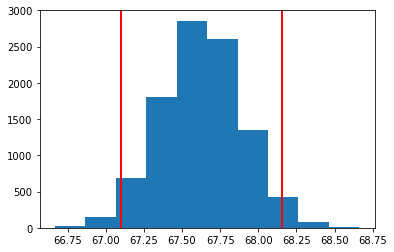

In [11]:
# plot the data 

plt.hist(means)
plt.axvline(x=low,color= 'r', linewidth = 2)
plt.axvline(x=upper,color= 'r', linewidth = 2)

##### we will use Standard deviation of the sample distribution to determine what the sampling distribution would look like if it came from the null hypothsis

In [14]:
np.std(means
      )

0.2658246390555901

### another way of thinking is we assume that null is true and we know the sampling distribution would look like if we were to simulate from the closest value under the null to the alternative (here is value of 70)

### in hypothsis test we first simulate from the closet value to the alternative that still in null space

In [16]:
# with sample size 150,the mean should follow
# normal distribution by centeral limit theorem
sample_df = df.sample(150)

means = []

for i in range(10000):
    bootsample = sample_df.sample(150,replace = True)
    means.append(bootsample.height.mean())
    
np.std(means)

0.2708023831794377

In [17]:
# each of the simulated draws here repesent 
# a possible mean from the null hypothsis
#
null_vals = np.random.normal(70,np.std(means),100000)

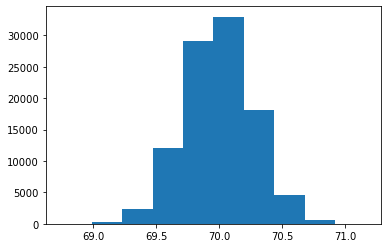

In [19]:
plt.hist(null_vals);

In [20]:
sample_df.height.mean()

67.56991579081225

In [21]:
# we can see above that the sample mean far from the sample distrubtion
# this show that most likily that the sample we took far from the null hypothsis
# comparing the actual sample mean to this distribution tells us the likelihood
# stat coming from the null

`3.` For 10,000 iterations: bootstrap the sample data, calculate the mean height for coffee drinkers and non-coffee drinkers, and calculate the difference in means for each sample.  You will want to have three arrays at the end of the iterations - one for each mean and one for the difference in means.  Use the results of your sampling distribution, to answer the third quiz question below.

In [22]:

full_data = pd.read_csv('coffee_dataset.csv')
sample_data = full_data.sample(200)

In [30]:
nocoff_means, coff_means, diffs = [], [], []

for i in range(10000):
    bootsample = sample_data.sample(200,replace = True)
    coff_mean = bootsample[bootsample['drinks_coffee'] == True]['height'].mean()
    nocoff_mean = bootsample[bootsample['drinks_coffee']==False]['height'].mean()
    # append the info
    coff_means.append(coff_mean)
    nocoff_means.append(nocoff_mean)
    diffs.append(coff_mean - nocoff_mean)

In [34]:
np.std(nocoff_means) # the standard deviation of the sampling distribution for nocoff

0.36953041142466414

In [32]:
np.std(coff_means) # the standard deviation of the sampling distribution for coff

0.2518432741883646

In [33]:
np.std(diffs) # the standard deviation for the sampling distribution for difference in means

0.44508066250069983

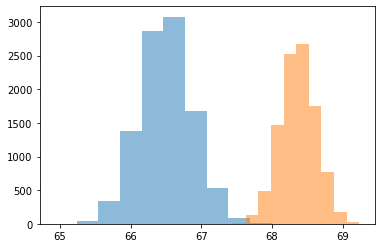

In [35]:
plt.hist(nocoff_means, alpha = 0.5);
plt.hist(coff_means, alpha = 0.5); # They look pretty normal to me!

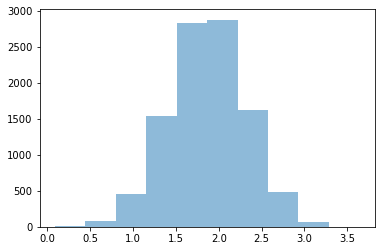

In [36]:
plt.hist(diffs, alpha = 0.5); # again normal - this is by the central limit theorem

`4.` Now, use your sampling distribution for the difference in means and [the docs](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to simulate what you would expect if your sampling distribution were centered on zero.  Also, calculate the observed sample mean difference in `sample_data`. Use your solutions to answer the last questions in the quiz below.

** We would expect the sampling distribution to be normal by the Central Limit Theorem, and we know the standard deviation of the sampling distribution of the difference in means from the previous question, so we can use this to simulate draws from the sampling distribution under the null hypothesis.  If there is truly no difference, then the difference between the means should be zero.**

In [38]:
null_vals = np.random.normal(0, np.std(diffs), 10000) # Here are 10000 draws from the sampling distribution under the null

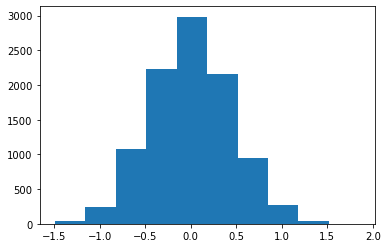

In [39]:
plt.hist(null_vals); #Here is the sampling distribution of the difference under the null

# p Value

#### The definition of a p-value is the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.

- p value involves 
`1.` sampling distribution
`2.` conditional probability



If your parameter is greater than some value in the alternative hypothesis, your shading would look like this to obtain your p-value

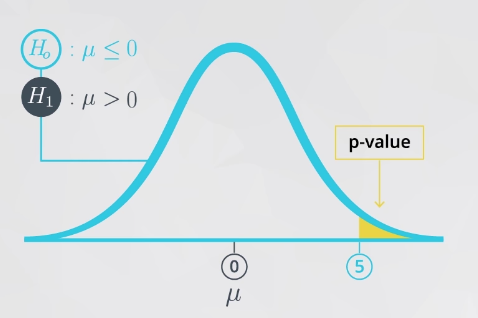

If your parameter is less than some value in the alternative hypothesis, your shading would look like this to obtain your p-value:




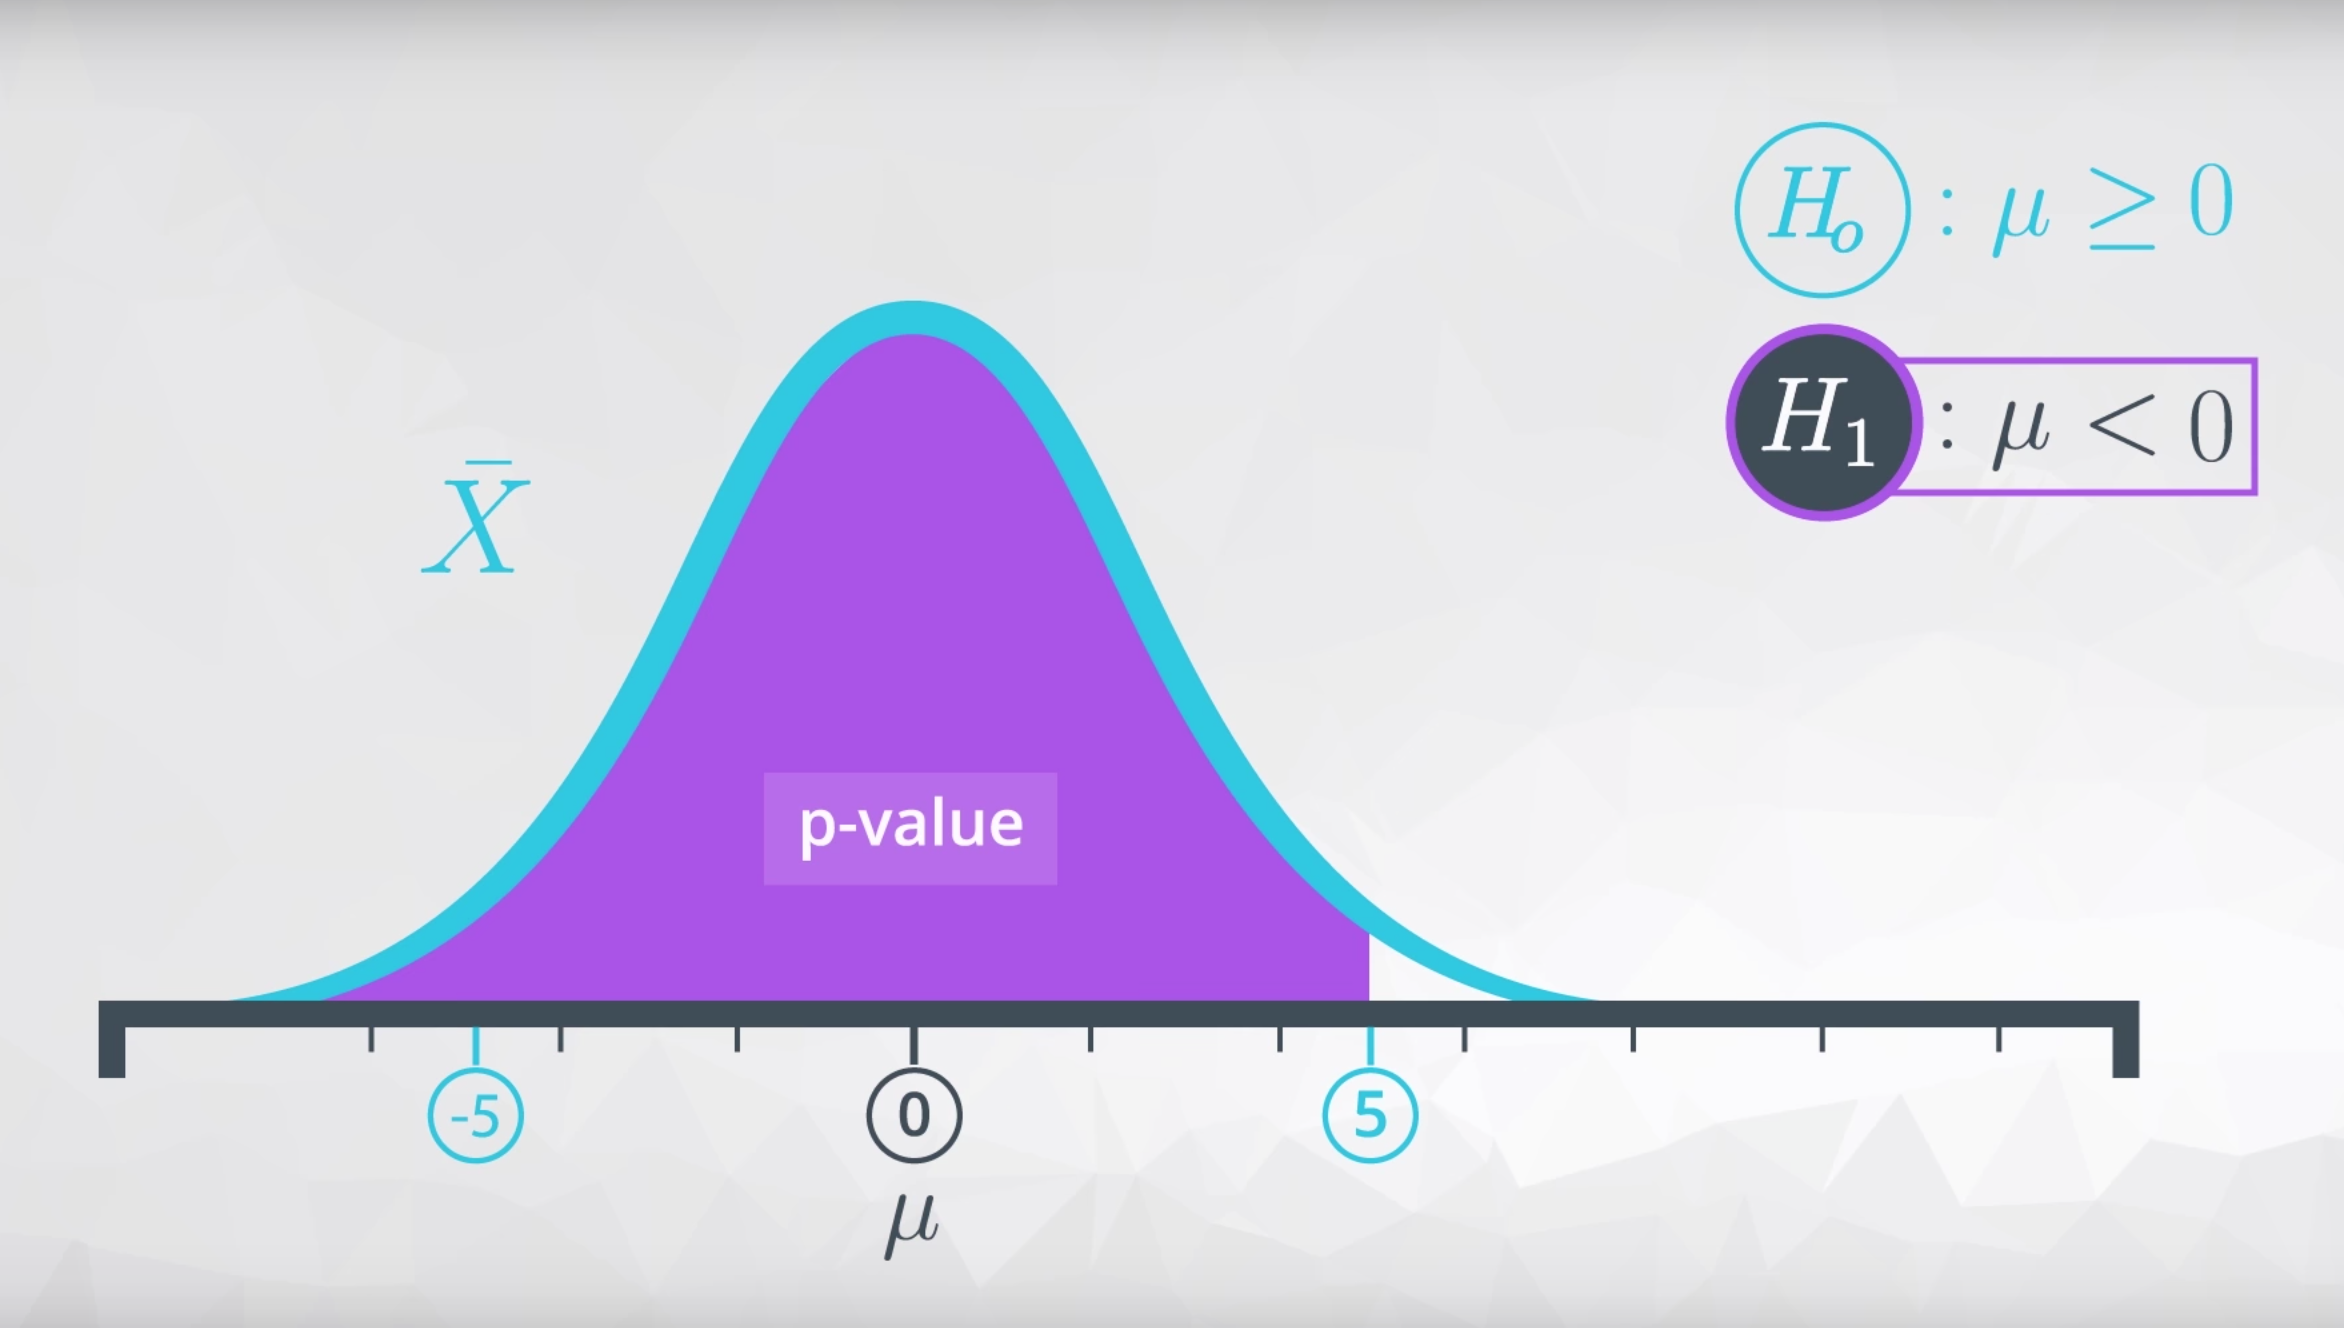

If your parameter is not equal to some value in the alternative hypothesis, your shading would look like this to obtain your p-value:



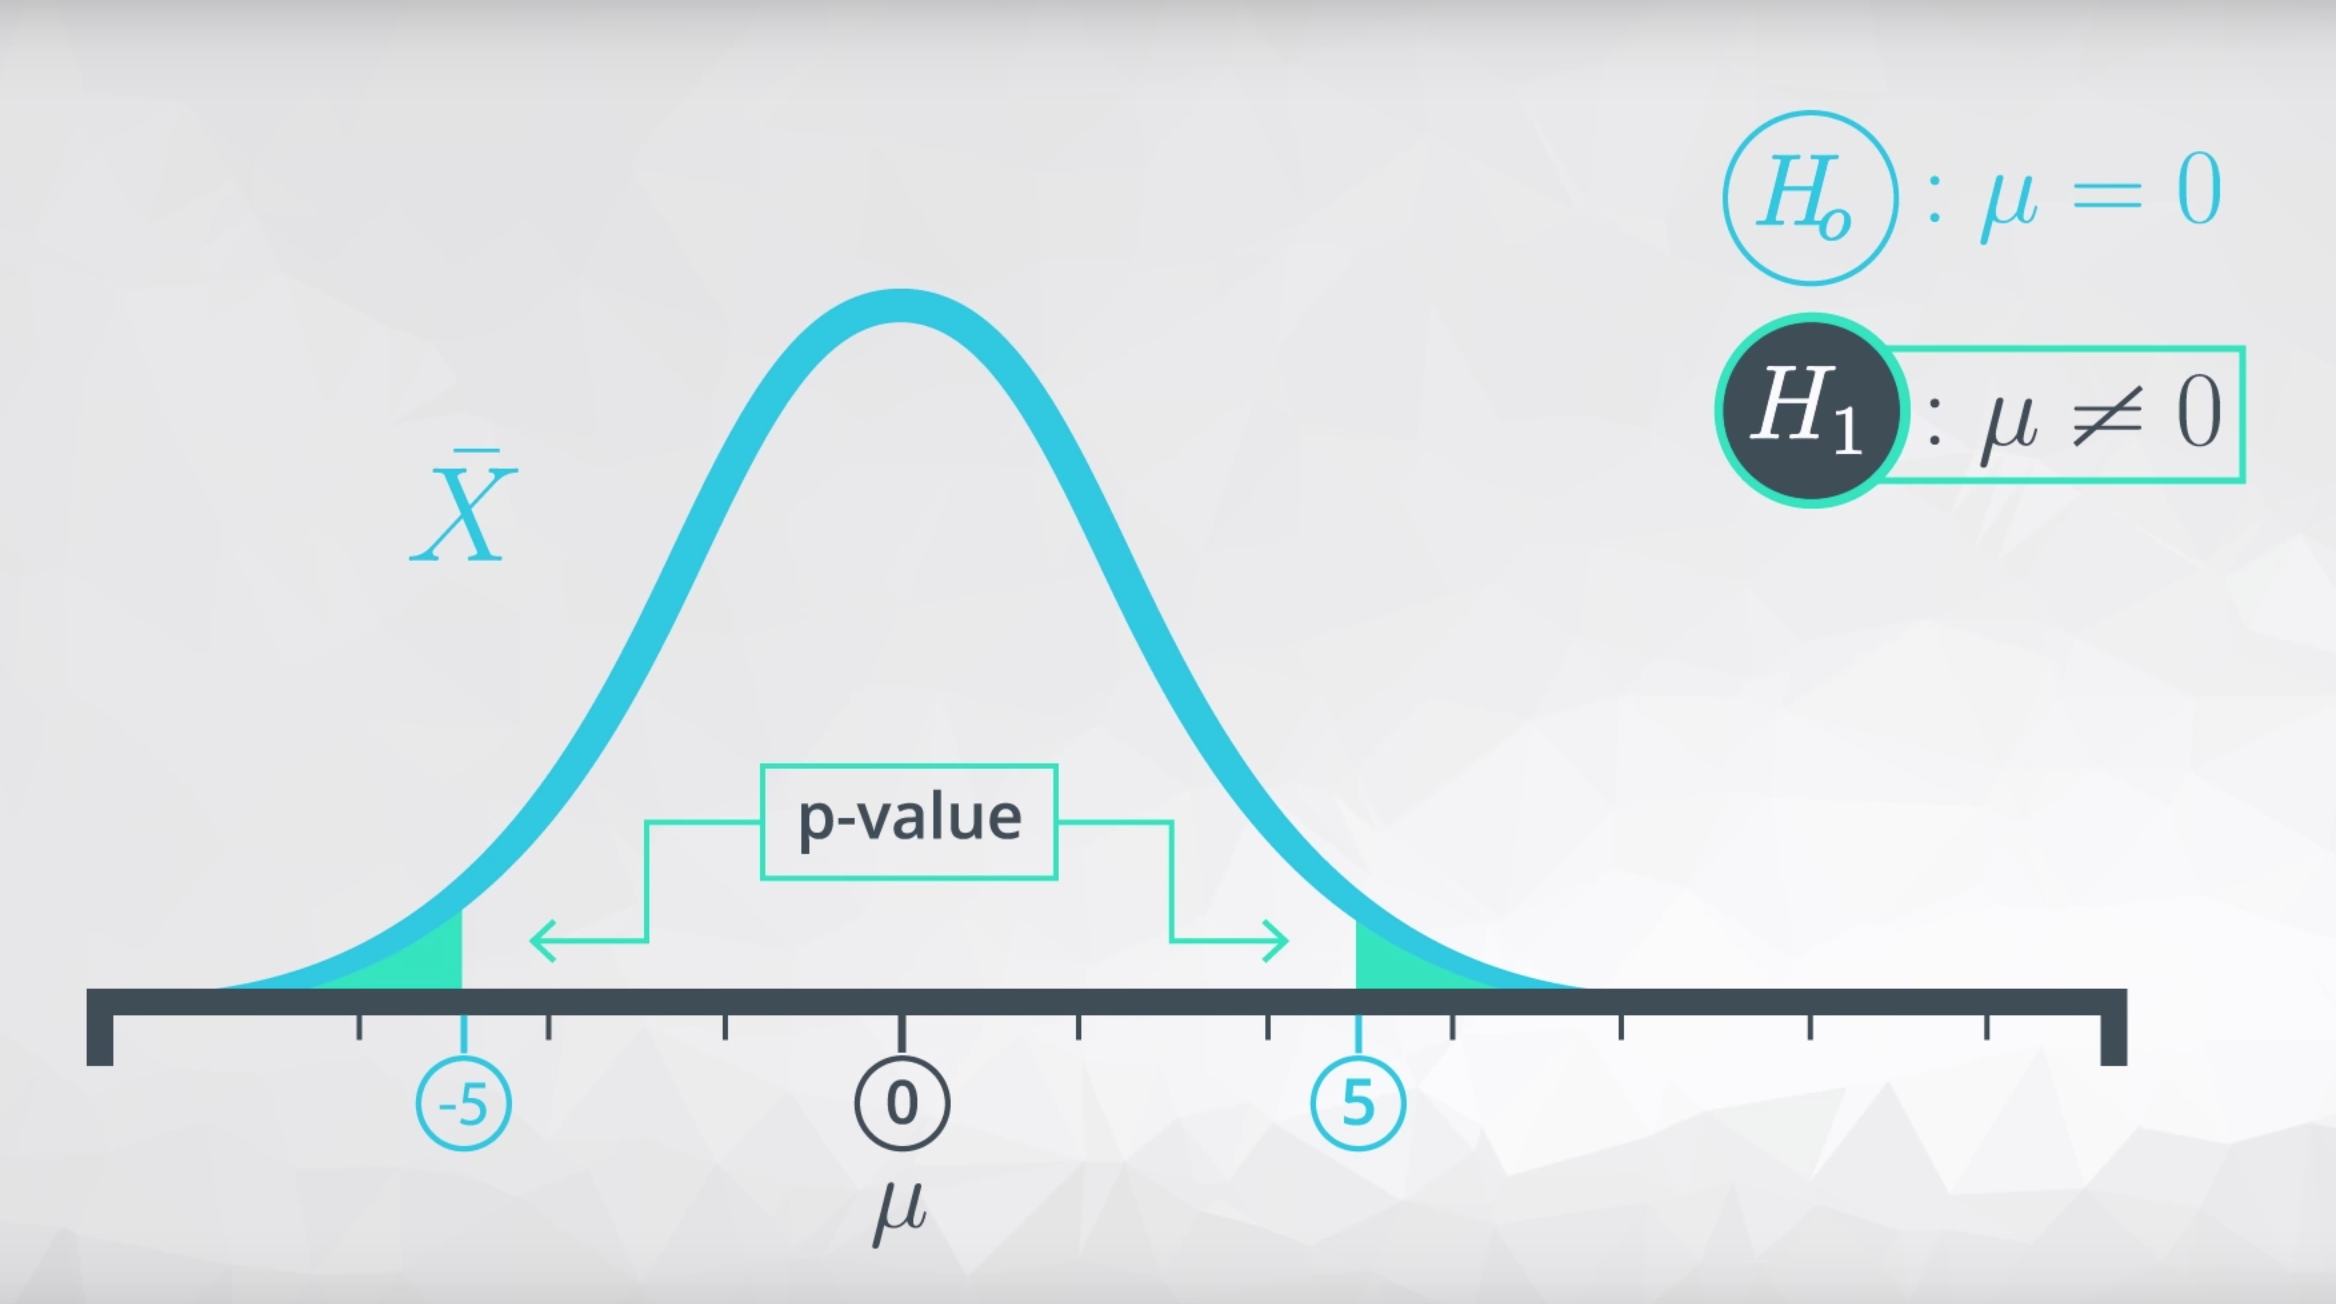

#### how to calculate p value

- large p value suggests that we shouldnt move awy from null  

how this connect to making decisions and the types of errors that we can make?

if p value is small this suggests its less likely to observe our statistic  from the null and it is more likely that it came from the alternative



Ex: 
- p-value = 0.03, alpha = 0.05 : Reject the null
- p-value = 0.20, alpha = 0.01 : fail to reject the null
- p-value = 0.10, alpha = 0.05 : fail to reject the null




In [42]:
jud_data = pd.read_csv('judicial_dataset_predictions.csv')
par_data = pd.read_csv('parachute_dataset.csv')

`1.` Above, you can see the actual and predicted columns for each of the datasets.  Using the **jud_data**, find the proportion of errors for the dataset, and furthermore, the percentage of errors of each type.  Use the results to answer the questions in quiz 1 below.

In [44]:
jud_data[jud_data['actual'] != jud_data['predicted']].shape[0]/jud_data.shape[0] # Number of errors

0.042152958945489497

In [46]:
jud_data.query("actual == 'innocent' and predicted == 'guilty'").count()[0]/jud_data.shape[0] # Type 1 errors

0.001510366607167376

In [47]:
jud_data.query("actual == 'guilty' and predicted == 'innocent'").count()[0]/jud_data.shape[0] # Type 2 errors

0.04064259233832212

In [48]:
# If everyone was predicted to be guilty, then every actual innocent 
# person would be a type I error.

# Type I = pred guilty, but actual = innocent
jud_data[jud_data['actual'] == 'innocent'].shape[0]/jud_data.shape[0]

0.45159961554304545

In [57]:
#If everyone has prediction of guilty, then no one is predicted inncoent
#Therefore, there would be no type 2 errors in this case

# Type II errs = pred innocent, but actual = guilty
0

0

`2.` Above, you can see the actual and predicted columns for each of the datasets.  Using the **par_data**, find the proportion of errors for the dataset, and furthermore, the percentage of errors of each type.  Use the results to answer the questions in quiz 2 below.

In [51]:
par_data[par_data['actual'] != par_data['predicted']].shape[0]/par_data.shape[0] # Number of errors


0.039972551037913875

In [53]:
par_data.query("actual == 'fails' and predicted == 'opens'").count()[0]/par_data.shape[0] # Type 1 errors


0.00017155601303825698

In [54]:
par_data.query("actual == 'opens' and predicted == 'fails'").count()[0]/par_data.shape[0] # Type 2 errors


0.03980099502487562

In [56]:
# If every parachute is predicted to fail, what is the proportion
# of type I errors made?

# Type I = pred open, but actual = fail
# In the above situation since we have none predicted to open,
# we have no type I errors

0

0

In [55]:
# If every parachute is predicted to fail, what is
# the proportion of Type II Errors made?  

# This would just be the total of actual opens in the dataset, 
# as we would label these all as fails, but actually they open

# Type II = pred fail, but actual = open
par_data[par_data['actual'] == 'opens'].shape[0]/par_data.shape[0]

0.9917653113741637

**A p-value is the probability of observing your data or more extreme data, if the null is true.  Type I errors are when you choose the alternative when the null is true, and vice-versa for Type II.  Therefore, deciding an individual is guilty when they are actually innocent is a Type I error.  The alpha level is a threshold for the percent of the time you are willing to commit a Type I error.**

`2.` If we consider each individual as a single hypothesis test, find the conservative Bonferroni corrected p-value we should use to maintain a 5% type I error rate.

In [60]:
df = pd.read_csv('judicial_dataset_pvalues.csv')
df.head()

bonf_alpha = 0.05/df.shape[0]
bonf_alpha

6.86530275985171e-06

**In order to find the number of type I errors made without the correction - we need to find all those that are actually innocent with p-values less than 0.05.**

In [61]:
df.query("actual == 'innocent' and pvalue < 0.05").count()[0]/df.shape[0] # If not used


0.001510366607167376

In [62]:
df.query("actual == 'innocent' and pvalue < @bonf_alpha").count()[0]/df.shape[0] # If used

0.0

**This is looking at individuals, and that is more of the aim for machine learning techniques.  Hypothesis testing and confidence intervals are for population parameters. Therefore, they are not meant to tell us about individual cases, and we wouldn't obtain p-values for individuals in this way. We could get probabilities, but that isn't the same as the probabilities associated with the relationship to sampling distributions as you have seen in these lessons.**

# Case study

- We computed the observed difference between the metric, click through rate, for the control and experiment group.
- We simulated the sampling distribution for the difference in proportions (or difference in click through rates).
- We used this sampling distribution to simulate the distribution under the null hypothesis, by creating a random normal distribution centered at 0 with the same spread and size.
- We computed the p-value by finding the proportion of values in the null distribution that were greater than our observed difference.
- We used this p-value to determine the statistical significance of our observed difference.

In [3]:
df = pd.read_csv('homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


In [4]:
# Question : does the experament page drive higher traffic than the control page?

In [17]:
# click through rate

control_df = df.query('group == "control"')
control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()
control_ctr

0.2797118847539016

In [18]:
experiment_df = df.query('group == "experiment"')
experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
experiment_ctr

0.3097463284379172

In [19]:
# calculate diffs in ctr between contral and experiment
# diff is 3%
obs_diff = experiment_ctr - control_ctr
obs_diff

0.030034443684015644

In [25]:
#bootsample

diffs = []

for _ in range(10000):
    b_samp = df.sample(df.shape[0],replace = True)
    control_df = b_samp.query('group == "control"')
    control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()
    experiment_df = b_samp.query('group == "experiment"')
    experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr-control_ctr)


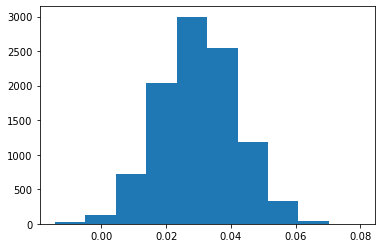

In [26]:
plt.hist(diffs);

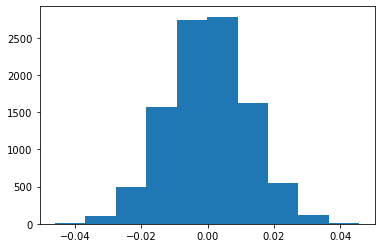

In [31]:
# to simulate from the null we will creat a normal distribution centered at zero 
# with the same STD as our sampling distribution we simulate here

diffs = np.array(diffs)
null_vals = np.random.normal(0, diffs.std(),diffs.size)

plt.hist(null_vals);

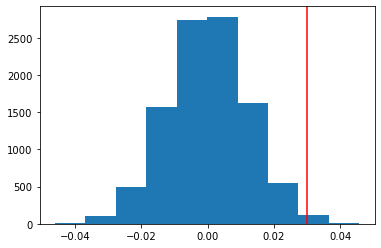

In [32]:
# where our observed stat falls
plt.hist(null_vals);
plt.axvline(x=obs_diff,color='r')

In [34]:
# p value
# all null value that are mopre extram than our stat in favor of the alternative 
# with a diff more than 0.5% does apper to be significant so we rject the h0
(null_vals > obs_diff).mean()

0.0052

In [35]:
df = pd.read_csv('course_page_actions.csv')
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [37]:
# Get dataframe with all records from control group

control_df = df.query('group == "control"')
# test
control_df.head()

,timestamp,id,group,action,duration
11,2016-09-24 22:42:41.218757,701620,control,view,302.951552
12,2016-09-24 22:43:35.119748,701620,control,view,NaN
14,2016-09-25 01:23:19.800167,439910,control,view,61.234458
16,2016-09-25 01:46:27.950552,842231,control,view,124.823065
20,2016-09-25 03:33:02.810074,882775,control,view,326.025765


In [39]:
# Compute click through rate for control group
control_ctr = control_df.query('action == "enroll"').id.nunique()/control_df.query('action == "view"').id.nunique()
# test
control_ctr

0.2364438839848676

In [40]:
# Get dataframe with all records from control group
experiment_df = df.query('group == "experiment"')
# test
experiment_df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [41]:
# Compute click through rate for experiment group
experiment_ctr = experiment_df.query('action == "enroll"').id.nunique()/experiment_df.query('action == "view"').id.nunique()
# test

experiment_ctr

0.2668693009118541

In [42]:
# Compute the observed difference in click through rates
obs_diff = experiment_ctr - control_ctr
obs_diff


0.030425416926986526

In [43]:
# Create a sampling distribution of the difference in proportions
# with bootstrapping
diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('action == "enroll"').id.nunique() / control_df.query('action == "view"').id.nunique()
    experiment_ctr = experiment_df.query('action == "enroll"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr - control_ctr)

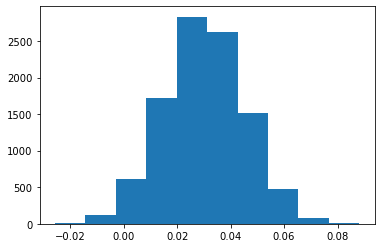

In [44]:
# Convert to numpy array
diffs = np.array(diffs)

# Plot sampling distribution
plt.hist(diffs);

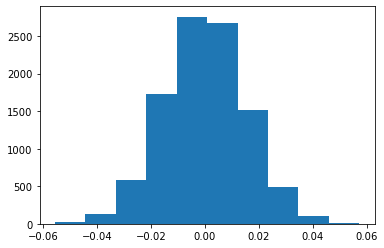

In [45]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

# Plot the null distribution
plt.hist(null_vals);

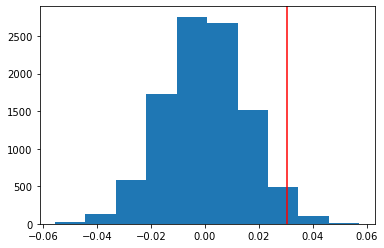

In [46]:
# Plot observed statistic with the null distibution
plt.hist(null_vals);
plt.axvline(obs_diff, c='red')

In [47]:
# Compute p-value
(null_vals > obs_diff).mean()

0.0225

Do you have evidence, with a type I error rate of 0.05, that users spend more time in the classroom after seeing the experimental description in the course overview page?

- YES

Is this difference practically significant?


- NO 
**BEC. it is less than  0.05% (0.0225 < 0.05)*

In [48]:
# Average Reading duration



,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [50]:
views = df.query('action=="view"')

reading_time = views.groupby(['id','group'])['duration'].mean()

In [54]:
# put it in dataframe
reading_time = reading_time.reset_index()
reading_time.head()

,index,id,group,duration
0,0,183260,control,107.331484
1,1,183615,experiment,24.627594
2,2,184277,experiment,193.212489
3,3,184360,experiment,226.586283
4,4,184589,experiment,12.052097


In [55]:
control_mean = df.query('group == "control"')['duration'].mean()
experiment_mean = df.query('group == "experiment"')['duration'].mean()
control_mean,experiment_mean

(115.40710650582038, 130.93220512539477)

In [56]:
obs_diff = experiment_mean - control_mean
obs_diff

15.525098619574393

In [57]:
diffs = []
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    control_mean = b_samp.query('group == "control"')['duration'].mean()
    experiment_mean = b_samp.query('group == "experiment"')['duration'].mean()
    diffs.append(experiment_mean - control_mean)


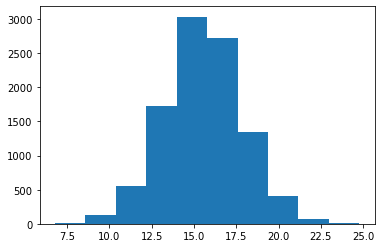

In [58]:
    
diffs  = np.array(diffs)

plt.hist(diffs);

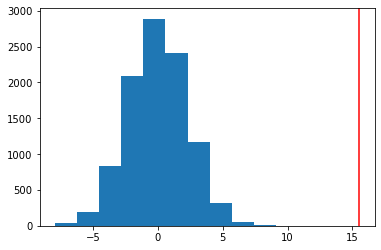

In [60]:
# p value
# our stat apper that it didnt came from the null

nullvals = np.random.normal(0,diffs.std(),diffs.size)

plt.hist(nullvals);
plt.axvline(x=obs_diff,color= 'r')